# Seattle Building Energy Forecasting

URL: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking

## Notebook n°4 - Bivariate Analysis / Feature Engineering

Objective: Better understand the infuence of each feature on the target

---

In [1115]:
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Settings

In [1116]:
sns.set(style="whitegrid")
target = "SiteEnergyUse(kBtu)"

target1 = "SiteEnergyUse(kBtu)"
target2 = "TotalGHGEmissions"

suffixe = ""
#suffixe = "-data-with-outliers"

## Import data

In [1117]:
with open(f"data/part3{suffixe}.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    data = my_unpickler.load()

In [1118]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Address,ZipCode,default_data
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,12.0,Hotel,65.0,6981428.0,249.43,47.612190,-122.337997,405 OLIVE WAY,98101.0,False
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,11.0,Hotel,51.0,8354235.0,263.51,47.613106,-122.333358,724 PINE ST,98101.0,False
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,2.0,Police Station,NaN,12051984.0,304.62,47.616439,-122.336764,810 VIRGINIA ST,98101.0,False
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,11.0,Hotel,25.0,6252842.0,208.46,47.614114,-122.332741,1619 9TH AVE,98101.0,False
7,2015,NonResidential,Other,7,DOWNTOWN,1926,8.0,Other - Entertainment/Public Assembly,NaN,6426022.0,199.99,47.612902,-122.331309,901 PINE ST,98101.0,False


## Functions

In [1119]:
def bivariate_analysis(data, x, y, aspect=15/5, rotation=0, violin=True):
    if violin:
        ax = sns.catplot(x=x, y=y, kind="violin", inner=None, data=data, height=5, aspect=aspect)
        plt.xticks(rotation=rotation)
        plt.show()
        
    ax = sns.catplot(x=x, y=y, kind="box", data=data, height=5, aspect=aspect)
    plt.xticks(rotation=rotation)
    plt.show()

## Pairplot

In [1120]:
cols = ['YearBuilt', 'NumberofFloors', 'Latitude', 'Longitude', 'ENERGYSTARScore', target1, target2]

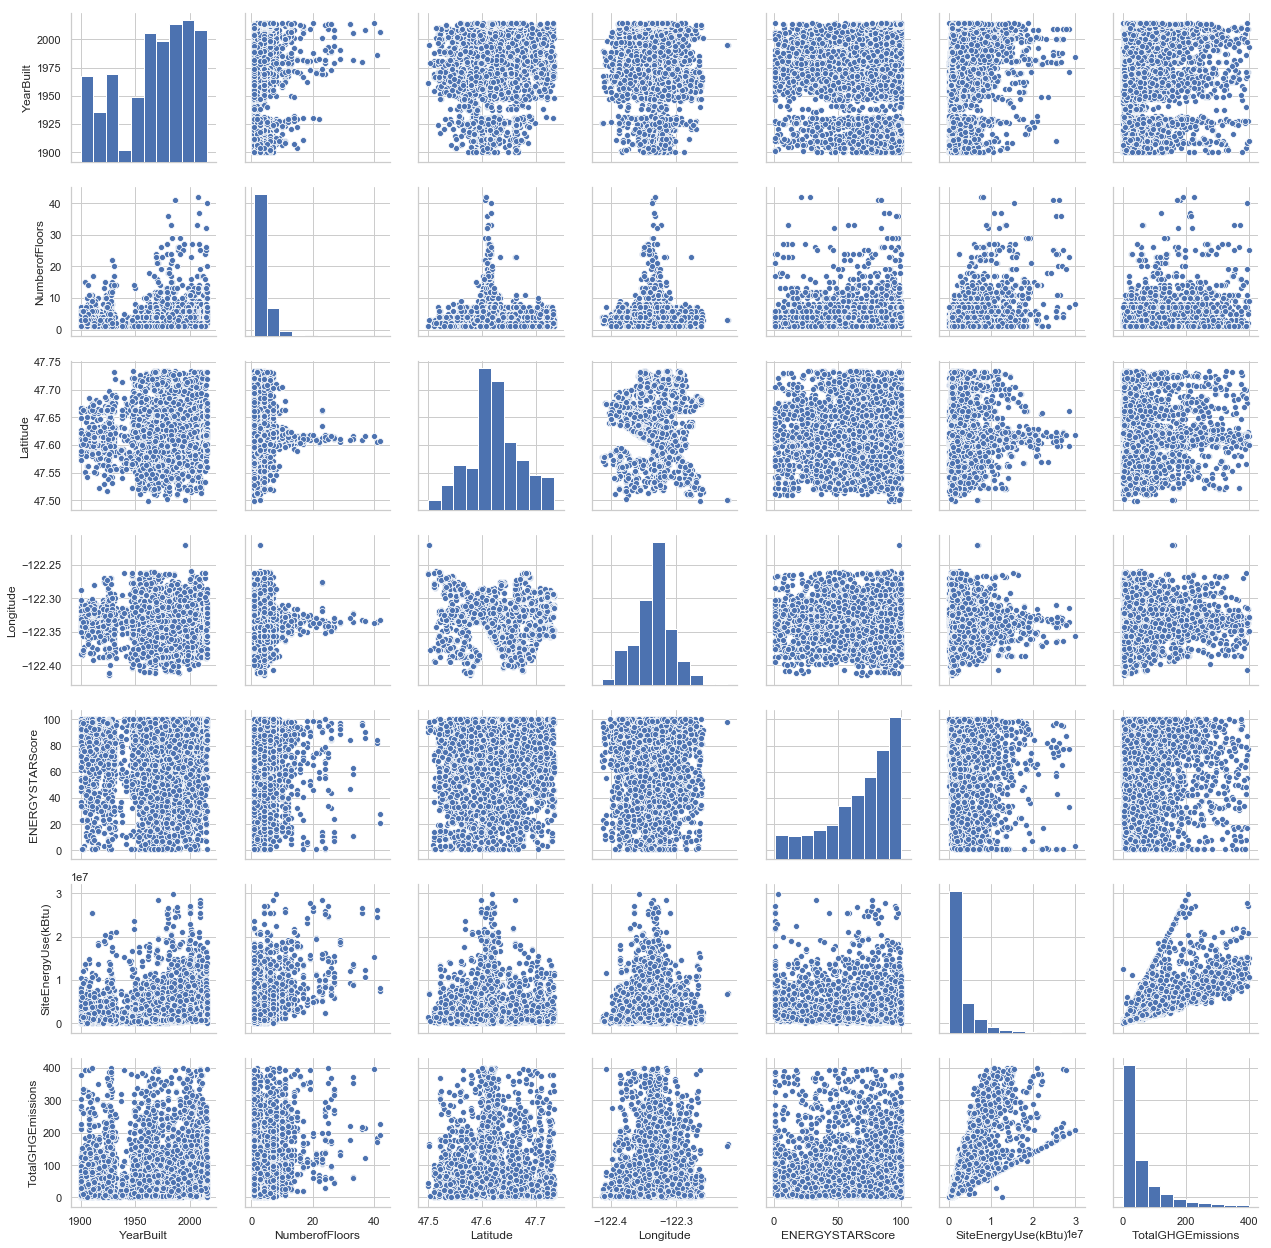

In [1121]:
sns.pairplot(data[cols]);

## Correlation matrix

In [1122]:
data.corr()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
DataYear,1.000000,-0.003233,0.013653,0.009185,0.002181,0.004988,0.007577,-0.002465,0.005069
CouncilDistrictCode,-0.003233,1.000000,-0.023419,0.270988,0.071592,0.152076,0.111162,0.506012,-0.265270
YearBuilt,0.013653,-0.023419,1.000000,0.167641,0.025693,0.140543,0.005544,0.124695,-0.058510
NumberofFloors,0.009185,0.270988,0.167641,1.000000,0.031172,0.434726,0.280777,0.013805,-0.051752
ENERGYSTARScore,0.002181,0.071592,0.025693,0.031172,1.000000,-0.137001,-0.122595,0.090398,-0.042139
SiteEnergyUse(kBtu),0.004988,0.152076,0.140543,0.434726,-0.137001,1.000000,0.758418,-0.033504,0.015737
TotalGHGEmissions,0.007577,0.111162,0.005544,0.280777,-0.122595,0.758418,1.000000,-0.041069,0.035526
Latitude,-0.002465,0.506012,0.124695,0.013805,0.090398,-0.033504,-0.041069,1.000000,0.006562
Longitude,0.005069,-0.265270,-0.058510,-0.051752,-0.042139,0.015737,0.035526,0.006562,1.000000


## Building Type

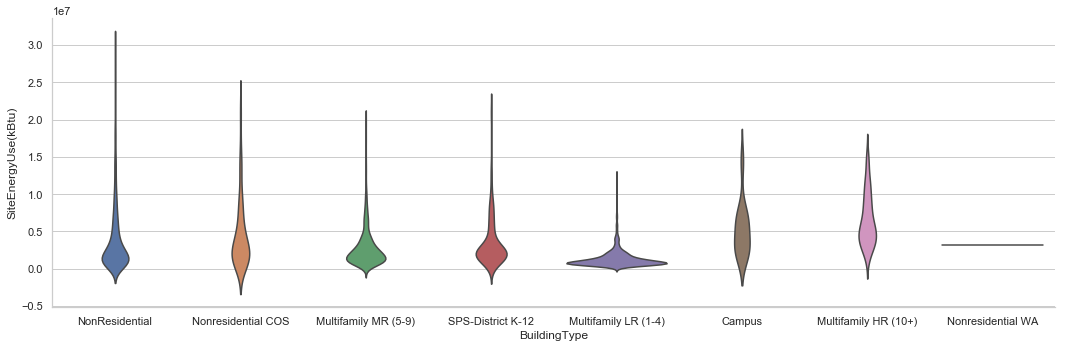

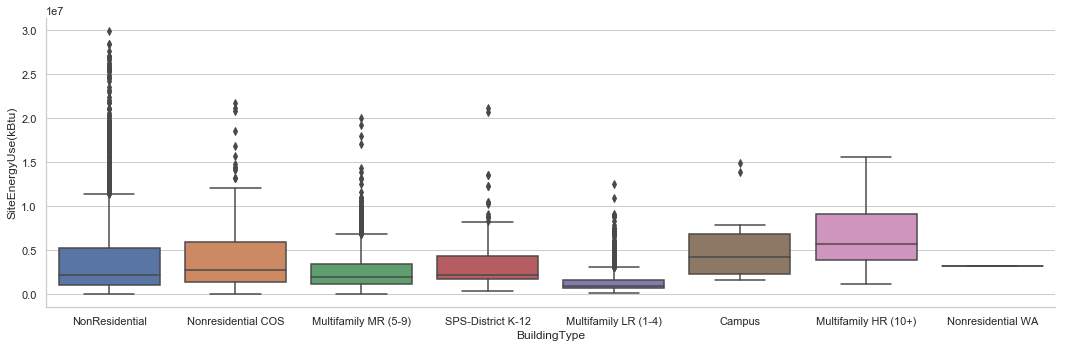

In [1123]:
bivariate_analysis(data, "BuildingType", target)

## CouncilDistrictCode

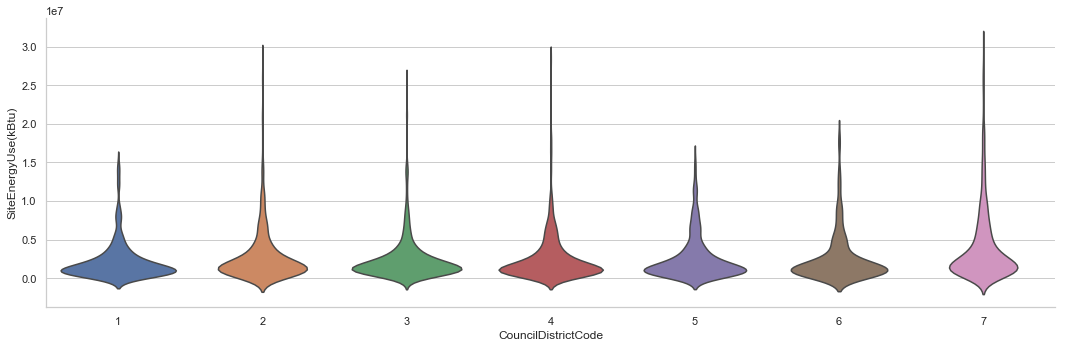

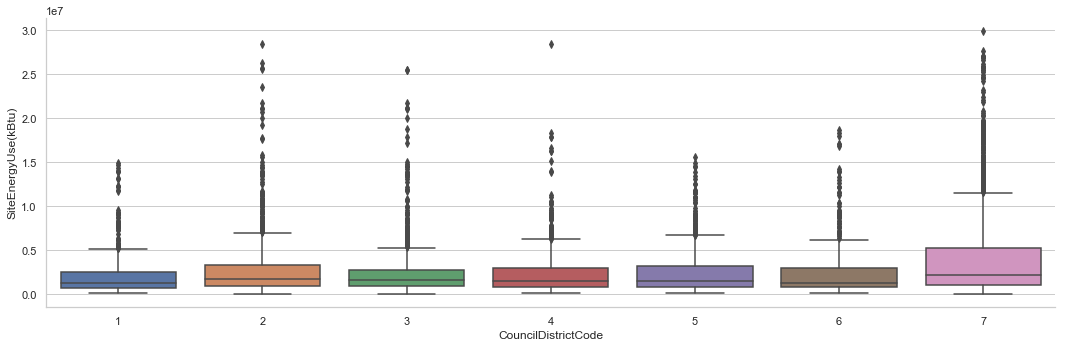

In [1124]:
bivariate_analysis(data, "CouncilDistrictCode", target)

## Neighborhood

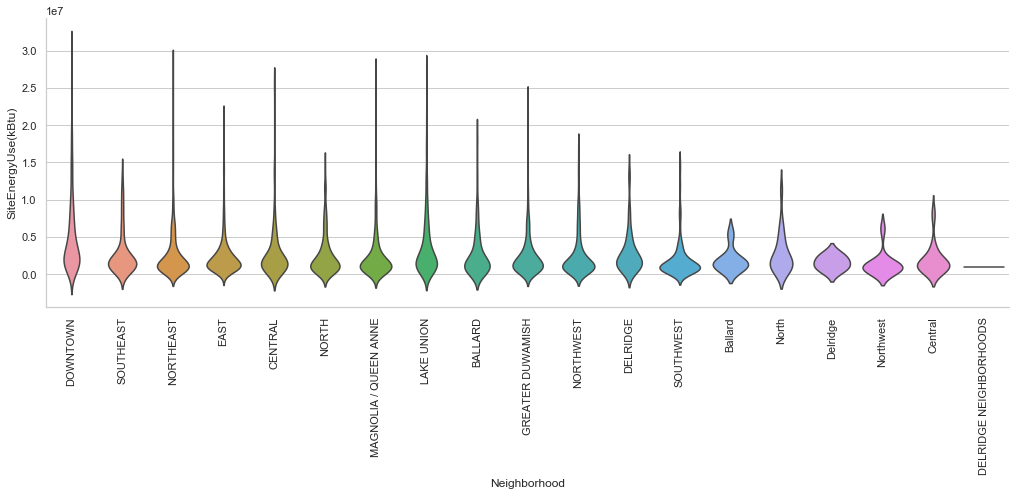

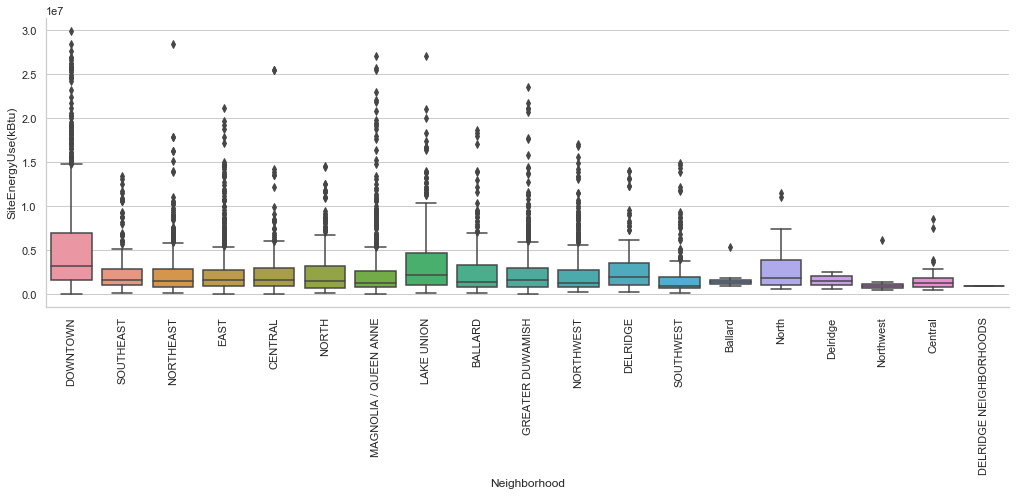

In [1125]:
bivariate_analysis(data, "Neighborhood", target, rotation=90)

## Latitude / Longitude

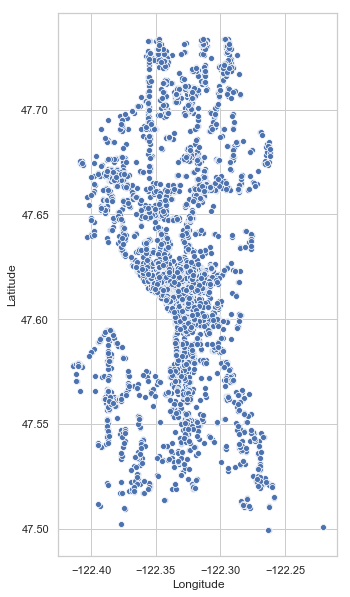

In [1126]:
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(x="Longitude", y="Latitude", data=data);

Let's create a range for Latitude and Longitude

In [1127]:
def lat_long_range(data):
    data["latitude_range"] = pd.cut(data["Latitude"], bins=14, labels=False)
    data["longitude_range"] = pd.cut(data["Longitude"], bins=7, labels=False)
    data["lat_long_range"] = data["latitude_range"].astype(str) + data["longitude_range"].astype(str)

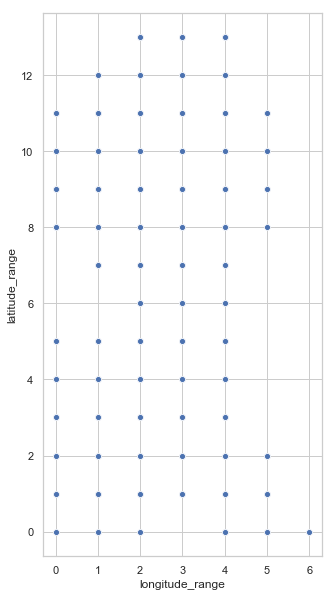

In [1128]:
lat_long_range(data)
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(x="longitude_range", y="latitude_range", data=data);

In [1129]:
data.drop(["latitude_range", "longitude_range"], axis=1, inplace=True)

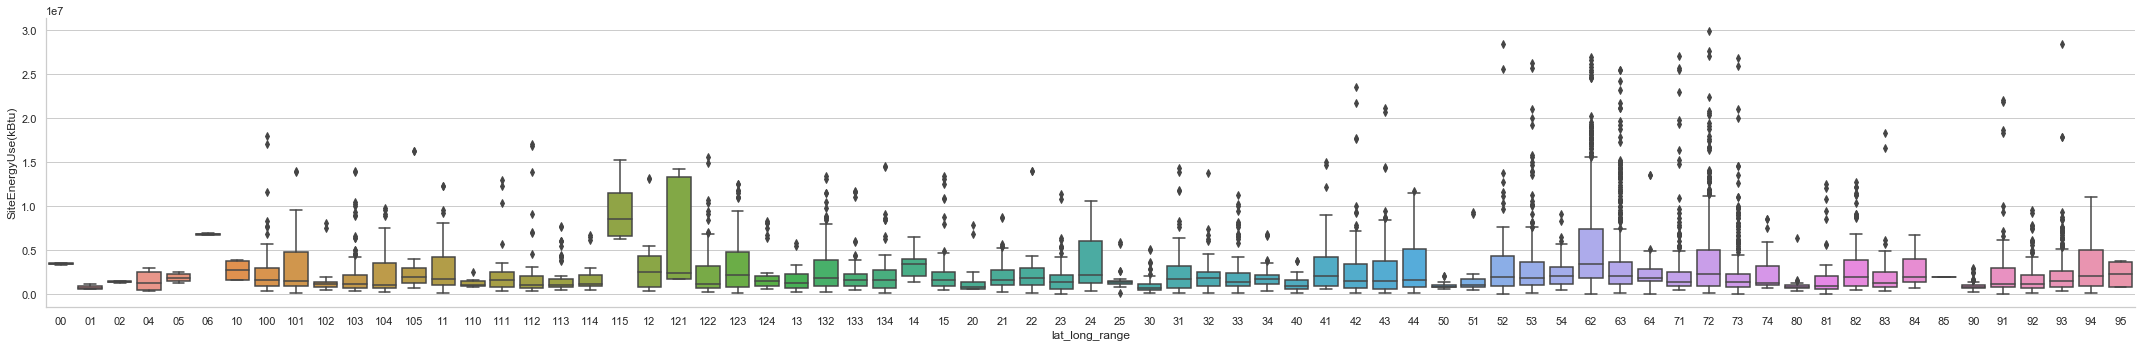

In [1130]:
x = "lat_long_range"
y = target

sns.catplot(x=x, y=y, kind="box", data=data, height=5, aspect=30/5);

## Address

In [1131]:
def address_type(val):
    if (re.search("WAY|Way", val)):
        return "Way"
    
    elif (re.search("ST|St | St$|Street", val)):
        return "Street"
    
    elif (re.search("AVE|Ave", val)):
        return "Avenue"
    
    else:
        return "Other"

In [1132]:
data["address_type"] = data["Address"].apply(address_type)

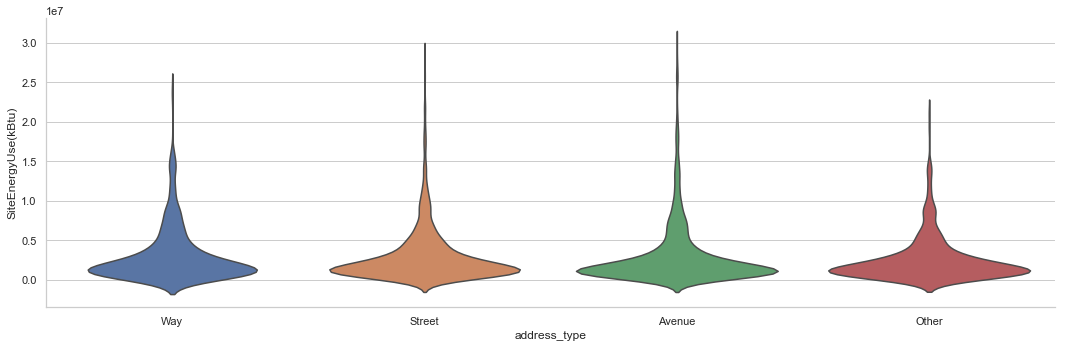

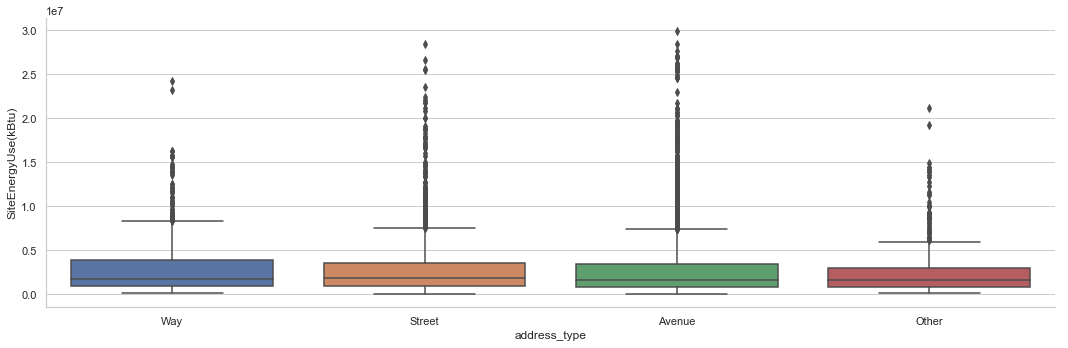

In [1133]:
bivariate_analysis(data, "address_type", target)

### LargestPropertyUseType

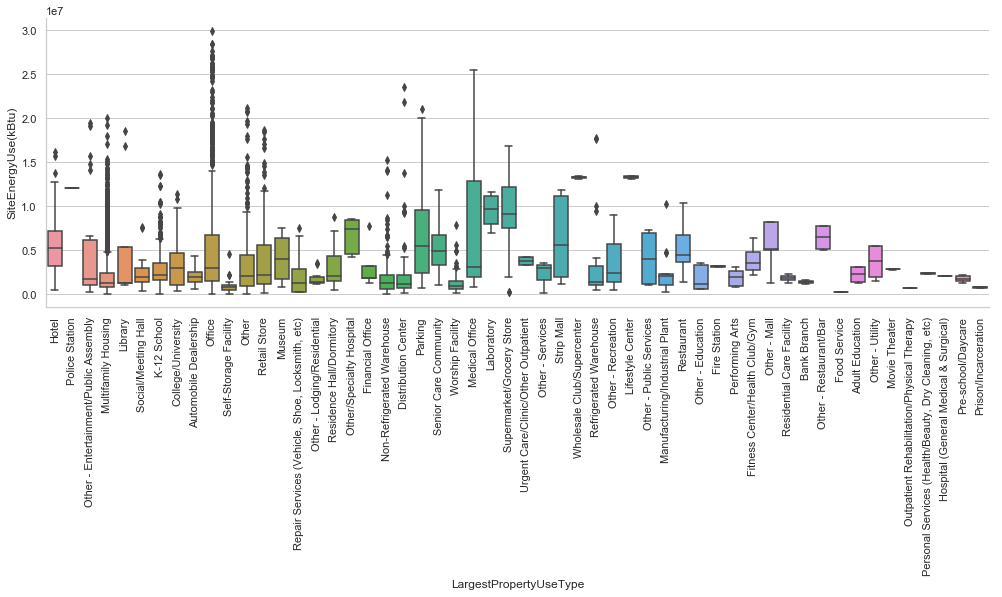

In [1134]:
bivariate_analysis(data, "LargestPropertyUseType", target, rotation=90, violin=False)

## PrimaryPropertyType

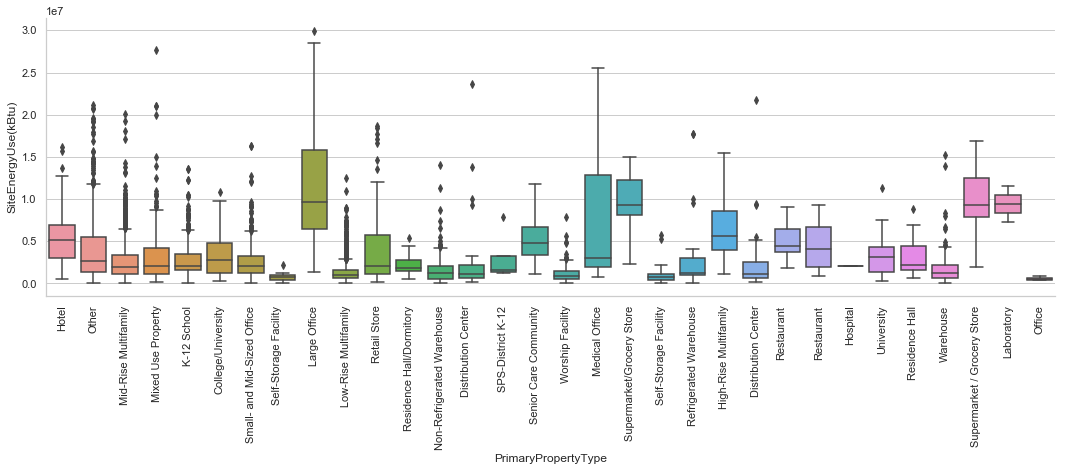

In [1135]:
bivariate_analysis(data, "PrimaryPropertyType", target, rotation=90, violin=False)

#### Let's compare PrimaryPropertyType and LargestPropertyUse

In [1136]:
mask = data["PrimaryPropertyType"] == data["LargestPropertyUseType"]
data_len = data.shape[0]

print(data_len)
print(data[mask].shape[0])
print(data[mask].shape[0] / data_len)

6333
1334
0.2106426654034423


In [1137]:
data.shape

(6333, 18)

In [1138]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Address,ZipCode,default_data,lat_long_range,address_type
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,12.0,Hotel,65.0,6981428.0,249.43,47.612190,-122.337997,405 OLIVE WAY,98101.0,False,62,Way
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,11.0,Hotel,51.0,8354235.0,263.51,47.613106,-122.333358,724 PINE ST,98101.0,False,62,Street
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,2.0,Police Station,NaN,12051984.0,304.62,47.616439,-122.336764,810 VIRGINIA ST,98101.0,False,62,Street
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,11.0,Hotel,25.0,6252842.0,208.46,47.614114,-122.332741,1619 9TH AVE,98101.0,False,62,Avenue
7,2015,NonResidential,Other,7,DOWNTOWN,1926,8.0,Other - Entertainment/Public Assembly,NaN,6426022.0,199.99,47.612902,-122.331309,901 PINE ST,98101.0,False,62,Street


## Save data

In [1139]:
with open(f"data/part4{suffixe}.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(data)